# Case 2: Water Layer

* Author: **Team G15**
* Attempt: 3

## Analysis

### To find

1. Temperature of Water Surface $(T_w)$
2. Total heat flux entering the house through the roof, $(q_t)$

### Nomenclature

* $S$ = Intensity of Solar Radiation (i.e. Solar Constant)
* $u_o$ = water velocity
* $v_o$ = wind velocity
* $\epsilon_w$ = emissivity of water surface
* $\sigma$ = Stefan-Boltzmann constant $(5.67*10^{-8}\ W/m^2K^4)$
* $T_r$ = inside room temperature
* $T_w$ = water surface temperature
* $T_{\infty}$ = outside air temperature
* $\overline T_w$ = average water surface temperature
* $\overline T_{\infty}$ = average outside air temperature
* $\tau_w$ = fraction of solar radiation absorbed by water
* $k_w$ = thermal conductivity of water
* $L_w$ = length of water layer
* $h_w$ = convection coefficient of water layer
* $h_r$ = radiative heat transfer coefficient
* $h_c$ = convective heat transfer coefficient
* $h_e$ = evaporative heat transfer coefficient

### Assumptions

1. Steady state with room maintained at fixed ambient temperature
2. Water is still ($u_o = 0$) but gentle breeze is present ($v_o = 10\ km/h$)
3. Dry Surroundings

### Equations

Using energy balance,
$$
  q_t = q_c + q_r - q_e
$$

with,

* Radiation heat transfer,
\begin{align*}
  q_r &= \tau_w\cdot S - h_r \cdot (T_{\infty} - T_w) \\
\\
  h_r &= \epsilon_w\cdot \sigma\cdot \frac{(\overline T_w)^4 - (\overline T_\infty - 12)^4}{\overline T_\infty - \overline T_w}
\end{align*}

* Convection heat transfer,
\begin{align*}
  q_c &= h_c\cdot (T_{\infty} - T_w) \\
\\
  h_c &= 5.678 \cdot (1 + 0.85\cdot(v_o - u_o))
\end{align*}

* Evaporative heat transfer,
\begin{align*}
  q_e &= 0.013\cdot h_c\cdot (p(\overline{T}_w) - \gamma\cdot p(\overline{T}_\infty)) \\
\\
  p(T) &= R_1\cdot T + R_2
\end{align*}

* Total heat transfer,
\begin{align*}
  q_t &= \frac{T_w - T_r}{R_{net}} \\
\\
  R_{net} &= \frac{1}{h_r} + \sum_{i=1}^{3} \frac{L_i}{k_i} + \frac{1}{h_{w}} \\
\\
  h_w &= \frac{k_w}{L_w}\cdot (0.14\cdot(Gr\cdot Pr)^{1/3} + 0.644\cdot (Pr\cdot Re)^{1/3}) \\
\\
  Gr &= \frac{g\cdot\beta\cdot(T_w-T_a)\cdot(L_w)^{3}}{\nu^2} \end{align*}

### Properties

#### Outside Air
* Mild breeze $v_o = 2.78\ m/s$
* $T_\infty \in [300, 330] K$
* $T_f = 320K$
* $\beta = \frac{1}{T_f} = 0.0031\ K^{-1}$
* Table A.4, air ($T_f$):
  * $\nu = 18 \cdot 10^{-6}\ m^2/s$
  * $\alpha = 25 \cdot 10^{-6}\ m^2/s$
  * $Pr = 0.702$
  * $k = 27.7 \cdot 10^{-3}\ W/m\cdot K$
* $p_{A, \infty} \approx 0$
* $S = 1366\ W/m^2$
* $R_1=325\ Pa/^\circ C$ and $R_2 = -5155\ Pa$ (*from reference* **#1**)
* $\gamma=0.27$ (approx average over a day)
* $r = 0.1$

#### Water layer
* $L_w = 0.1\ m$ (approx thickness of water layer)
* Table A.6, water ($T_w$):
  * $\nu = 18 \cdot 10^{-6}\ m^2/s$
* Still water $u_o = 0$
* $\epsilon_w = 0.95$
* $\tau_w=0.2$

#### Roof
* $t = 0.2\ m$ thick with,
  * Cement = $5\ cm$
  * Brick = $10\ cm$
  * Lime = $5\ cm$
* $K_i$, Conductivity of each layer,
  * Cement = $0.72\ W/m\cdot K$
  * Brick = $0.71\ W/m\cdot K$
  * Lime = $0.73\ W/m\cdot K$

#### Inside air
* $T_r = 300K$ (Room Temperature)
* $h_r = 8.4\ W/m^2\cdot K$

### Tools used

* **Python**
* **SymPy** for creating symbolic equations and solving them
* **NumPy**
* **Matplotlib** for plotting results

## Solving (Python Code)

### Initialize Values

In [1]:
import sympy as sp
import numpy as np

#### Outside Air

* Saturation pressure of water p = R_1\*T + R_2

In [40]:
v_o = 2.78 # Velocity (m / s)

# Temperatures
T_f = 320 # (K)
beta = 1/T_f # (K)
T_oo = np.array([305.0, 310.0, 315.0, 320.0]) # (K)
T_oo_avg = 273 + 37 # (K)

# Constants
sigma = 5.67e-8 # Stefan Boltzmann constant (W / m^2 * K^4)
g = 9.8 # (m^2 / s)
R_1 = 325 # N / m^2 °C
R_2 = -5155 # N / m^2
gamma = 0.27
S = 1366 # Solar constant

def p(T): # Saturation pressure of water as a function of temperature (N / m^2)
    return R_1 * (T-273) + R_2

#### Water Layer

In [11]:
u_o = 0 # Velocity (m / s)
L_w = 5 # Dimensions (m)

# Temperatures
T_w = sp.symbols('T_w') # (K)
T_w_avg = 273 + 32 # (K)

# Constants
epsilon_w = 0.95 # Emissivity of water surface
tau_w = 0.6 # Water's solar absorbtivity

* Table A.6 used (*from reference* **#2**)
* Upon analysing the below data, we can approximate $h_w$ to $950\ W/m^2$

In [22]:
rho_w = 990 # density (kg / m^3)
k_w = 0.63 # thermal conductivity (W / m * K)
mu_w = 1e-6 * np.array([769, 695, 631, 577]) # viscosity (N * s / m^2)
nu_w = mu_w / rho_w # dynamic visosity (m^2 / s)

Pr_w = np.array([5.20, 4.62, 4.16, 3.77]) # Prandtl number
Re_w = 0 # Reynolds number, still water
Gr_w = g * beta * (T_oo - T_w) * L_w**3 / nu_w**2 # Grashof number

# Water free convection coeffecient
h_w = (k_w/L_w) * (0.14 * (Gr_w*Pr_w)**(1/3) + 0.644 * (Pr_w*Re_w)**(1/3))

# Example at T_oo = 310K and T_w = 306K
h_w_test = h_w[1].replace(T_w, 306)
print('Approximate min value of h_w = %.2f' % (h_w_test))

Approximate min value of h_w = 923.62


#### Roof Layers

In [27]:
k_1 = 0.72 # Concrete (W / m * K)
k_2 = 0.71 # Brick (W / m * K)
k_3 = 0.73 # Lime (W / m * K)

L_1 = 0.05 # Concrete (m)
L_2 = 0.10 # Brick (m)
L_3 = 0.05 # Lime (m)

#### Inside Air

In [24]:
h_r = 8.4 # (W / m^2 * K)
T_r = 300 # (K)

### Equations

#### Radiation Heat

In [26]:
h_r = epsilon_w * sigma * (T_w_avg**4 - (T_oo_avg - 12)**4)/(T_oo_avg - T_w_avg) # (W / m^2 * K)
q_r = tau_w * S - h_r * (T_oo - T_w) # (W / m^2)

# Example at T_oo = 310K and T_w = 306K
q_r_test = q_r[1].replace(T_w, 306)
print('Approximate value of q_r = %.2f' % (q_r_test))

Approximate value of q_r = 786.53


#### Convection Heat

* Forced convection and free convection both have been used

In [31]:
h_c = 5.678 * (1 + 0.85 * (v_o - u_o))
print('h_c = %.2f' % (h_c))

q_c = h_c * (T_oo - T_w) # (W / m^2)

# Example at T_oo = 310K and T_w = 306K
q_c_test = q_c[1].replace(T_w, 306)
print('Approximate value of q_c = %.2f' % (q_c_test))

h_c = 19.10
Approximate value of q_c = 76.38


#### Evaporation Heat:

In [35]:
q_e = 0.013 * h_c * (p(T_w_avg) - gamma * p(T_oo_avg)) # function p defined above, (W / m^2)

# Example at T_oo = 310K and T_w = 306K
print('Approximate value of q_e = %.2f' % (q_e))

Approximate value of q_e = 841.55


#### Total Heat:

In [39]:
h_w = 1200 # from above approximation (W / m^2 * K)
R = 1/h_r + L_1/k_1 + L_2/k_2 + L_3/k_3 + 1/h_w # (m^2 * K / W)

q_t = (T_w - T_r) / R # (W / m^2)

# Example at T_oo = 310K and T_w = 306K
q_t_test = q_t.replace(T_w, 306)
print('Approximate value of q_t = %.2f' % (q_t_test))

Approximate value of q_t = 14.98


### Solving

\begin{align*}
  q_c + q_r - q_e &= q_t
\\
  \therefore\hspace{3pt} q_c + q_r - q_e - q_t &= 0
\end{align*}

#### Calculate $T_w$

In [52]:
eq = q_c + q_r - q_e - q_t

n = len(eq)
T_w_calc = np.empty(n, dtype=object)

for i in range(n):
    T_w_calc[i] = round(sp.solve(eq[i], T_w)[0], 2)

for i in range(n):
    print('T_w = %.1f K for T_oo = %.1f K' % (T_w_calc[i], T_oo[i]))

T_w = 302.4 K for T_oo = 305.0 K
T_w = 306.5 K for T_oo = 310.0 K
T_w = 310.5 K for T_oo = 315.0 K
T_w = 314.6 K for T_oo = 320.0 K


#### Calculate $q_t$

In [48]:
q_t_calc = np.empty(n, dtype=object)

for i in range(n):
    q_t_calc[i] = q_t.replace(T_w, T_w_calc[i])

for i in range(n):
    print('Heat entering = %.1f W/m^2 for T_oo = %.1f K' % (q_t_calc[i], T_oo[i]))

Heat entering = 6.0 W/m^2 for T_oo = 305.0 K
Heat entering = 16.2 W/m^2 for T_oo = 310.0 K
Heat entering = 26.3 W/m^2 for T_oo = 315.0 K
Heat entering = 36.5 W/m^2 for T_oo = 320.0 K


### Plot

* Temp Drop Due to Water ($T_\infty - T_w$) vs Outside Air Temp ($T_\infty$)
* Total Heat Flux Entering ($q_t$) vs Outside Air Temp ($T_\infty$)

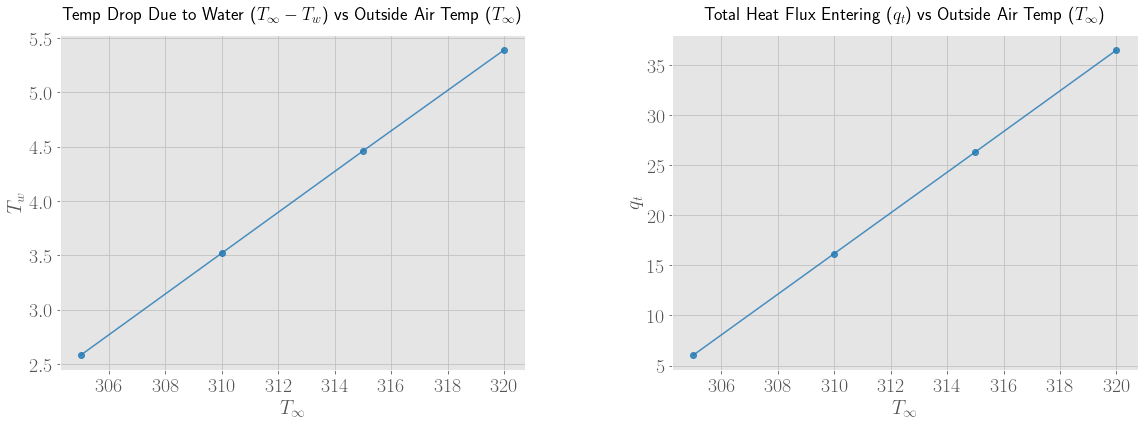

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt

# Initialize matplotlib
plt.rc('text', usetex=True) # Unnecessary
plt.style.use('ggplot')
plt.rcParams['grid.color'] = '#C0C0C0'

fig = plt.figure(figsize=(16, 6))

ax1 = fig.add_subplot(121)
plt.plot(T_oo, T_oo-T_w_calc, color='#1F77B4cc', marker='o')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('$T_\infty$', fontsize=20)
plt.ylabel('$T_w$', fontsize=20)
plt.title('Temp Drop Due to Water ($T_\infty - T_w$) vs Outside Air Temp ($T_\infty$)', fontsize=18, pad=15)

ax2 = fig.add_subplot(122)
plt.plot(T_oo, q_t_calc, color='#1F77B4cc', marker='o')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('$T_\infty$', fontsize=20)
plt.ylabel('$q_t$', fontsize=20)
plt.title('Total Heat Flux Entering ($q_t$) vs Outside Air Temp ($T_\infty$)', fontsize=18, pad=15)

fig.tight_layout(w_pad=10)

## References

1. A. Shrivastava *et al*. ["Evaporative cooling model..."](https://github.com/relaxxpls/CL246-G15/blob/main/docs/papers/Experimental_validation_of_a_thermal_mod.pdf) (1984)
2. F. Incropera *et al*. "Fundamentals of Heat and Mass Transfer."